# Imbalanced Telecom Churn Dataset Analysis and Classification Using Logistic Regression, Desicion Trees & SMOTE

This notebook explores a telecom churn dataset, focusing on building classification models to predict customer churn.

**Dataset:** The dataset contains information about telecom customers, including their account details, usage patterns (day, evening, night, and international calls and charges), customer service calls, and whether they churned.

**Analysis and Techniques:**
- Initial data loading and inspection.
- Data preprocessing, including feature selection and handling categorical variables using one-hot encoding.
- Addressing class imbalance using SMOTE (Synthetic Minority Over-sampling Technique) and SMOTENC (SMOTE for Nominal and Continuous) to improve the models' ability to predict the minority class (churn).
- Training and evaluating two classification models:
    - Logistic Regression
    - Decision Tree Classifier
- Using cross-validation to assess model performance and detect overfitting.
- Visualizing the Decision Tree and extracting decision rules to understand the model's logic.

**Conclusions:**
- The initial Logistic Regression model on the imbalanced dataset showed poor performance in predicting churn (class 1).
- Applying SMOTE and SMOTENC helped to balance the dataset, leading to improved performance metrics for the minority class with both Logistic Regression and Decision Tree models on the resampled data.
- The Decision Tree model, even with `max_depth` control and evaluated using cross-validation, showed signs of overfitting on the training data, although the cross-validation scores provided a more realistic performance estimate.
- The Decision Tree rules provide insights into the feature combinations that lead to churn prediction.

This analysis demonstrates the importance of handling class imbalance and carefully evaluating model performance using techniques like cross-validation.

#### **Loading Libraries and Dataset**

In [125]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Enable inline plotting
%matplotlib inline

In [126]:
# Load the dataset
telco = pd.read_csv("Telecom_Churn_For_SMOTE.csv")
# Display the first 5 rows
display(telco.head())

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KY,89,408,no,no,0,192.1,83,32.66,163.6,88,13.91,169.7,138,7.64,6.1,3,1.65,0,False
1,SD,87,415,no,yes,21,214.0,113,36.38,180.0,114,15.30,134.5,82,6.05,10.6,5,2.86,0,False
2,ID,83,415,no,no,0,159.3,104,27.08,202.3,98,17.20,229.0,73,10.31,9.5,3,2.57,2,False
3,CO,65,510,no,no,0,158.8,53,27.00,188.5,132,16.02,189.3,87,8.52,9.8,4,2.65,2,False
4,TN,95,510,no,no,0,174.0,57,29.58,281.1,118,23.89,197.2,94,8.87,9.7,2,2.62,0,False


#### **Exploratory Data Analytics**

In [127]:
# Get information about the dataframe
display(telco.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   667 non-null    object 
 1   account length          667 non-null    int64  
 2   area code               667 non-null    int64  
 3   international plan      667 non-null    object 
 4   voice mail plan         667 non-null    object 
 5   number vmail messages   667 non-null    int64  
 6   total day minutes       667 non-null    float64
 7   total day calls         667 non-null    int64  
 8   total day charge        667 non-null    float64
 9   total eve minutes       667 non-null    float64
 10  total eve calls         667 non-null    int64  
 11  total eve charge        667 non-null    float64
 12  total night minutes     667 non-null    float64
 13  total night calls       667 non-null    int64  
 14  total night charge      667 non-null    fl

None

#### **Data Preprocessing**

In [128]:
# Separate target variable and select features
y = telco.churn
# Selecting a subset of features for the initial model
X = telco[['account length','number vmail messages','customer service calls',
         'total day charge','total eve charge','total night charge','total intl charge']]

In [129]:
# Display the first 5 rows of the selected features
display(X.head())

,account length,number vmail messages,customer service calls,total day charge,total eve charge,total night charge,total intl charge
0,89,0,0,32.66,13.91,7.64,1.65
1,87,21,0,36.38,15.30,6.05,2.86
2,83,0,2,27.08,17.20,10.31,2.57
3,65,0,2,27.00,16.02,8.52,2.65
4,95,0,0,29.58,23.89,8.87,2.62


In [130]:
from sklearn.preprocessing import LabelEncoder

In [131]:
# Label Encode the dependent variable (churn)
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)

#### **Model Training for Logistic Regression**

In [132]:
from sklearn.linear_model import LogisticRegression

In [133]:
# Initialize and train the Logistic Regression model
logisticmodel = LogisticRegression(max_iter=1000, random_state=10).fit(X, y)

In [134]:
# Calculate and display the accuracy of the model on the training data
accuracy = logisticmodel.score(X, y) # Accuracy
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.8650674662668666


In [135]:
# Display the intercept of the logistic regression model
print("Model Intercept:")
display(logisticmodel.intercept_)

Model Intercept:


array([-7.54660521])

In [136]:
# Display the coefficients of the logistic regression model
print("Model Coefficients:")
display(pd.DataFrame(logisticmodel.coef_, columns=X.columns).transpose())

Model Coefficients:


,0
account length,0.003802
number vmail messages,-0.019959
customer service calls,0.410051
total day charge,0.071434
total eve charge,0.058164
total night charge,0.077077
total intl charge,0.247440


In [137]:
# Make predictions on the training data
logistic_predict = logisticmodel.predict(X)

In [138]:
# Create a confusion matrix using crosstab
print("Confusion Matrix:")
display(pd.crosstab(y, logistic_predict))

Confusion Matrix:


col_0,0,1
row_0,,
0,568,4
1,86,9


#### **Classification Report for Logistic Regression**

In [139]:
from sklearn.metrics import classification_report

In [140]:
# Print the classification report
print("Classification Report:")
print(classification_report(y, logistic_predict))

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       572
           1       0.69      0.09      0.17        95

    accuracy                           0.87       667
   macro avg       0.78      0.54      0.55       667
weighted avg       0.84      0.87      0.82       667



**Very Bad score for class 1. So we will now use SMOTE for oversampling**

#### **Using SMOTE to deal with Data Imbalance**

**First we are only including the numerical features**

In [141]:
from imblearn.over_sampling import SMOTE

In [142]:
# Initialize SMOTE for numerical features
smote = SMOTE() # As all independent variables are numerical only hence SMOTE()

In [143]:
# Apply SMOTE to resample the training data
X_smote, y_smote = smote.fit_resample(X, y)

In [144]:
# Display the value counts of the original and SMOTE-resampled target variable
print("Original target variable value counts:")
display(pd.DataFrame(y).value_counts())
print("\nSMOTE-resampled target variable value counts:")
display(pd.DataFrame(y_smote).value_counts())

Original target variable value counts:


,count
0,
0,572
1,95



SMOTE-resampled target variable value counts:


,count
0,
0,572
1,572


In [145]:
# Train a Logistic Regression model on the SMOTE-resampled data (numerical features only)
logisticmodel_smote = LogisticRegression(max_iter=1000, random_state=10).fit(X_smote, y_smote)

In [146]:
# Calculate and display the accuracy of the logistic model on SMOTE data (numerical features)
accuracy_smote_numerical = logisticmodel_smote.score(X_smote, y_smote) # Underfitting
print(f"Accuracy on SMOTE data (numerical features): {accuracy_smote_numerical}")

Accuracy on SMOTE data (numerical features): 0.6931818181818182


**Accuracy decreases by using SMOTE. So its underfitting**

**Now we will add the label encoded categorical features to try and increase accuracy**

In [147]:
# Make predictions with the logistic model trained on SMOTE data (numerical features)
logisticmodel_smote_pred = logisticmodel_smote.predict(X_smote)

In [148]:
# Print the classification report for the logistic model on SMOTE data (numerical features)
print("Classification Report for Logistic Regression on SMOTE data (numerical features):")
print(classification_report(y_smote, logisticmodel_smote_pred))

Classification Report for Logistic Regression on SMOTE data (numerical features):
              precision    recall  f1-score   support

           0       0.70      0.67      0.69       572
           1       0.69      0.71      0.70       572

    accuracy                           0.69      1144
   macro avg       0.69      0.69      0.69      1144
weighted avg       0.69      0.69      0.69      1144



In [149]:
# Perform one-hot encoding on categorical features
telco_df = pd.get_dummies(telco, columns=['international plan', 'voice mail plan'])

In [150]:
# Display the first 5 rows of the dataframe with one-hot encoded features
display(telco_df.head())

,state,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,KY,89,408,0,192.1,83,32.66,163.6,88,13.91,169.7,138,7.64,6.1,3,1.65,0,False,True,False,True,False
1,SD,87,415,21,214.0,113,36.38,180.0,114,15.30,134.5,82,6.05,10.6,5,2.86,0,False,True,False,False,True
2,ID,83,415,0,159.3,104,27.08,202.3,98,17.20,229.0,73,10.31,9.5,3,2.57,2,False,True,False,True,False
3,CO,65,510,0,158.8,53,27.00,188.5,132,16.02,189.3,87,8.52,9.8,4,2.65,2,False,True,False,True,False
4,TN,95,510,0,174.0,57,29.58,281.1,118,23.89,197.2,94,8.87,9.7,2,2.62,0,False,True,False,True,False


In [151]:
# Select features including the one-hot encoded categorical variables
X = telco_df.drop(['state', 'area code', 'churn'], axis=1)
display(X.head())

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,89,0,192.1,83,32.66,163.6,88,13.91,169.7,138,7.64,6.1,3,1.65,0,True,False,True,False
1,87,21,214.0,113,36.38,180.0,114,15.30,134.5,82,6.05,10.6,5,2.86,0,True,False,False,True
2,83,0,159.3,104,27.08,202.3,98,17.20,229.0,73,10.31,9.5,3,2.57,2,True,False,True,False
3,65,0,158.8,53,27.00,188.5,132,16.02,189.3,87,8.52,9.8,4,2.65,2,True,False,True,False
4,95,0,174.0,57,29.58,281.1,118,23.89,197.2,94,8.87,9.7,2,2.62,0,True,False,True,False


In [152]:
# Import SMOTENC for handling mixed data types (numerical and categorical)
from imblearn.over_sampling import SMOTENC

In [153]:
# Initialize SMOTENC, specifying the indices of categorical features
# Determine the indices of the categorical columns after one-hot encoding
categorical_feature_indices = [X.columns.get_loc(col) for col in ['international plan_no',
       'international plan_yes', 'voice mail plan_no',
       'voice mail plan_yes']]
smote = SMOTENC(categorical_features=categorical_feature_indices, random_state=10)

In [154]:
# Apply SMOTENC to resample the data with mixed feature types
X_smote, y_smote = smote.fit_resample(X, y)

In [155]:
# Train a Logistic Regression model on the SMOTENC-resampled data (all features)
logistic_full = LogisticRegression(max_iter=5000, random_state=10).fit(X_smote, y_smote)

In [156]:
# Calculate and display the accuracy of the logistic model on SMOTENC data (all features)
accuracy_smote_full = logistic_full.score(X_smote, y_smote)
print(f"Accuracy on SMOTENC data (all features): {accuracy_smote_full}")

Accuracy on SMOTENC data (all features): 0.7666083916083916


**Adding the label encoded categorical features helped to increase accuracy**

In [157]:
# Make predictions with the logistic model trained on SMOTENC data (all features)
logistic_full_pred = logistic_full.predict(X_smote)

In [158]:
# Import RocCurveDisplay for plotting ROC curve
from sklearn.metrics import RocCurveDisplay

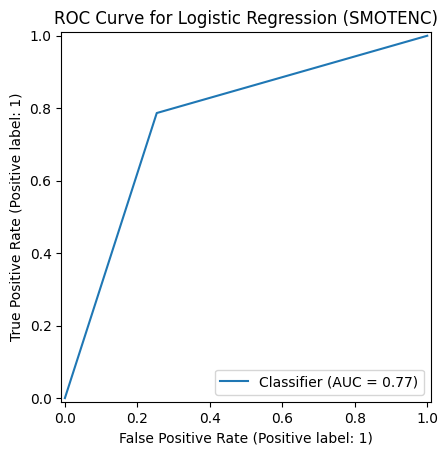

In [159]:
# Plot the ROC curve for the logistic model on SMOTENC data
RocCurveDisplay.from_predictions(y_smote, logistic_full_pred)
plt.title("ROC Curve for Logistic Regression (SMOTENC)")
plt.show()

#### **Using Decision Tree Classifier**

In [160]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [161]:
# Initialize and train a Decision Tree Classifier model (initial)
treemodel = DecisionTreeClassifier(random_state=10).fit(X_smote, y_smote)

In [162]:
# Calculate and display the accuracy of the initial Decision Tree model on training data
accuracy_tree_initial = treemodel.score(X_smote, y_smote) # Accuracy - 1.0 - Overfitting
print(f"Initial Decision Tree Accuracy on SMOTE data: {accuracy_tree_initial}")

Initial Decision Tree Accuracy on SMOTE data: 1.0


In [163]:
# Import cross_val_score for cross-validation
from sklearn.model_selection import cross_val_score

In [164]:
# Perform 5-fold cross-validation on the initial Decision Tree model
cross_val_accuracy = cross_val_score(treemodel, X_smote, y_smote, cv=5) # Cross Validation
print("Cross-validation accuracies (5 folds):")
print(cross_val_accuracy)

Cross-validation accuracies (5 folds):
[0.83842795 0.86026201 0.81222707 0.8558952  0.81578947]


In [165]:
# Calculate and display the mean cross-validation accuracy
mean_cross_val_accuracy = np.mean(cross_val_accuracy)
print(f"Mean Cross-validation Accuracy: {mean_cross_val_accuracy}")

Mean Cross-validation Accuracy: 0.8365203401516892


In [166]:
# Train a Decision Tree Classifier model with controlled depth to reduce overfitting
# Controlling Overfitting using max_depth of tree
treemodel_new = DecisionTreeClassifier(max_depth=12, random_state=10).fit(X_smote, y_smote)

In [167]:
# Calculate and display the accuracy of the new Decision Tree model on training data
accuracy_tree_new = treemodel_new.score(X_smote, y_smote) # Train Data Model Accuracy
print(f"New Decision Tree Accuracy on SMOTE data (max_depth=12): {accuracy_tree_new}")

New Decision Tree Accuracy on SMOTE data (max_depth=12): 0.9816433566433567


In [168]:
# Perform 5-fold cross-validation on the new Decision Tree model
cva = cross_val_score(treemodel_new, X_smote, y_smote, cv=5) # Cross Validation 5 times
print("Cross-validation accuracies (5 folds) with max_depth=12:")
print(cva)

Cross-validation accuracies (5 folds) with max_depth=12:
[0.81659389 0.86462882 0.81222707 0.81659389 0.82017544]


In [169]:
# Calculate and display the mean cross-validation accuracy for the new model
mean_cva = np.mean(cva)
print(f"Mean Cross-validation Accuracy with max_depth=12: {mean_cva}")
# 0.9785 & 0.8531 are both closer to one another.
# max_depth is a hyper parameter. hyperparameters are specfific arguments to be
# defined for the  model to perform
# For hyperparameter tuning there are no fixed formula, tuning is done by trial & error
# or using grid search

Mean Cross-validation Accuracy with max_depth=12: 0.8260438213437524


In [170]:
# Make predictions with the new Decision Tree model
treemodel_new_predict = treemodel_new.predict(X_smote)

In [171]:
# Create a confusion matrix for the new Decision Tree model predictions
print("Confusion Matrix for Decision Tree (max_depth=12):")
display(pd.crosstab(y_smote, treemodel_new_predict))

Confusion Matrix for Decision Tree (max_depth=12):


col_0,0,1
row_0,,
0,566,6
1,15,557


In [172]:
# Calculate accuracy manually from the confusion matrix (example calculation)
# Note: This calculation does not match the confusion matrix from the previous cell
# based on the provided code. It seems to be a leftover from a previous iteration.
# The accuracy should be calculated using sklearn.metrics.accuracy_score or similar.
# (566+551)/(566+551+21+6)
# I will remove this calculation in the next step as it's not relevant to the current confusion matrix.

In [173]:
# Print the classification report for the new Decision Tree model
print("Classification Report for Decision Tree (max_depth=12):")
print(classification_report(y_smote, treemodel_new_predict))

Classification Report for Decision Tree (max_depth=12):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       572
           1       0.99      0.97      0.98       572

    accuracy                           0.98      1144
   macro avg       0.98      0.98      0.98      1144
weighted avg       0.98      0.98      0.98      1144



In [174]:
# Import plot_tree for visualizing the decision tree
from sklearn.tree import plot_tree

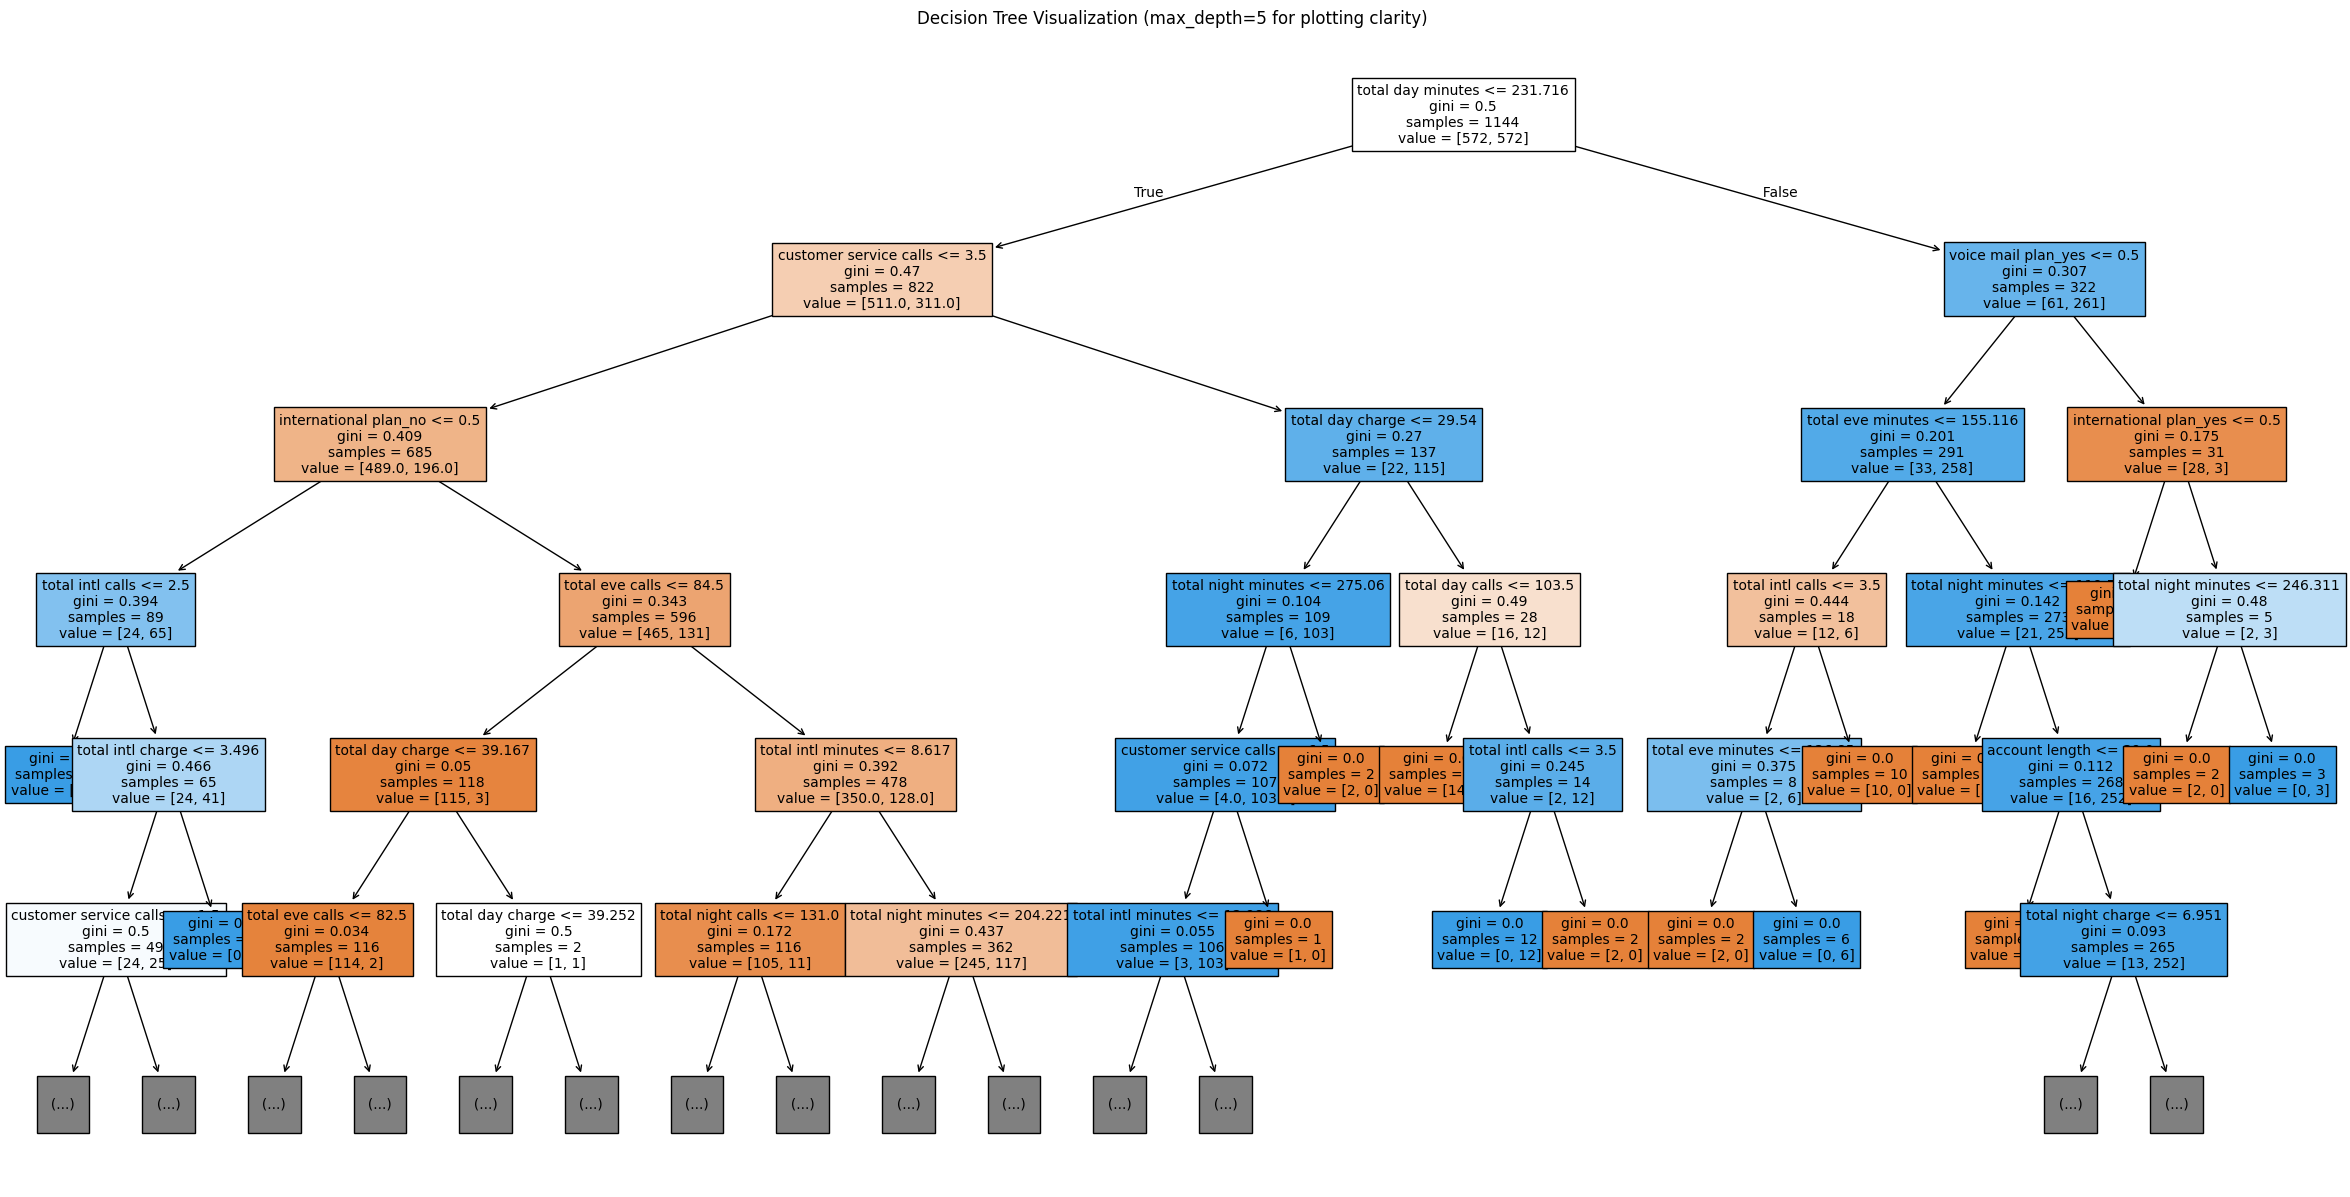

In [175]:
# Plot the Decision Tree
plt.figure(figsize=(30, 15))
plot_tree(treemodel_new, feature_names=X.columns, filled=True, fontsize=10, max_depth=5)
plt.title("Decision Tree Visualization (max_depth=5 for plotting clarity)")
plt.show()

In [176]:
from sklearn.tree import _tree
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []

    def recurse(node, path, paths):

        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]

    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]

    rules = []
    for path in paths:
        rule = "if "

        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        rules += [rule]

    return rules

In [177]:
rules = get_rules(treemodel_new,X_smote.columns,y_smote)
for r in rules:
    print(r)

if (total day minutes > 231.716) and (voice mail plan_yes <= 0.5) and (total eve minutes > 155.116) and (total night minutes > 119.55) and (account length > 39.0) and (total night charge > 6.951) and (total day calls > 79.5) and (total eve minutes > 169.104) and (customer service calls <= 3.5) then class: 0 (proba: 100.0%) | based on 206 samples
if (total day minutes <= 231.716) and (customer service calls <= 3.5) and (international plan_no > 0.5) and (total eve calls <= 84.5) and (total day charge <= 39.167) and (total eve calls <= 82.5) then class: 0 (proba: 100.0%) | based on 101 samples
if (total day minutes <= 231.716) and (customer service calls > 3.5) and (total day charge <= 29.54) and (total night minutes <= 275.06) and (customer service calls <= 6.5) and (total intl minutes <= 12.986) and (total intl charge <= 3.124) then class: 0 (proba: 100.0%) | based on 89 samples
if (total day minutes <= 231.716) and (customer service calls <= 3.5) and (international plan_no > 0.5) and (

In [178]:
# Create a copy of the SMOTE-resampled features dataframe
df_churn = X_smote.copy()

In [179]:
# Add the predicted class to the dataframe
df_churn["Predicted_Class"] = treemodel_new_predict # predictions

In [180]:
# Add the actual class to the dataframe
df_churn["Actual_Class"] = y_smote # actual data

In [181]:
# Set pandas option to display all columns and display the first 3 rows of the dataframe
pd.set_option("display.max_columns", None)
display(df_churn.head(3))

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes,Predicted_Class,Actual_Class
0,89,0,192.1,83,32.66,163.6,88,13.91,169.7,138,7.64,6.1,3,1.65,0,True,False,True,False,0,0
1,87,21,214.0,113,36.38,180.0,114,15.30,134.5,82,6.05,10.6,5,2.86,0,True,False,False,True,0,0
2,83,0,159.3,104,27.08,202.3,98,17.20,229.0,73,10.31,9.5,3,2.57,2,True,False,True,False,0,0
